# Исследование объявлений о продаже квартир

В вашем распоряжении данные сервиса Яндекс Недвижимость — архив объявлений о продаже квартир в Санкт-Петербурге и соседних населённых пунктах за несколько лет. Нужно научиться определять рыночную стоимость объектов недвижимости. Ваша задача — установить параметры. Это позволит построить автоматизированную систему: она отследит аномалии и мошенническую деятельность.
По каждой квартире на продажу доступны два вида данных. Первые вписаны пользователем, вторые — получены автоматически на основе картографических данных. Например, расстояние до центра, аэропорта, ближайшего парка и водоёма.

<h1>Содержание<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Изучение-данных-из-файла" data-toc-modified-id="Изучение-данных-из-файла-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Изучение данных из файла</a></span><ul class="toc-item"><li><span><a href="#Вывод" data-toc-modified-id="Вывод-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Вывод</a></span></li></ul></li><li><span><a href="#Предобработка-данных" data-toc-modified-id="Предобработка-данных-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Предобработка данных</a></span><ul class="toc-item"><li><span><a href="#Заменим-нулевые-значения-в-сeiling_height-на-медианные-значения" data-toc-modified-id="Заменим-нулевые-значения-в-сeiling_height-на-медианные-значения-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>Заменим нулевые значения в сeiling_height на медианные значения</a></span></li><li><span><a href="#Избавимся-от-незаполненных-значений-в-floors_total--и-locality_name" data-toc-modified-id="Избавимся-от-незаполненных-значений-в-floors_total--и-locality_name-2.2"><span class="toc-item-num">2.2&nbsp;&nbsp;</span>Избавимся от незаполненных значений в <strong>floors_total</strong>  и <strong>locality_name</strong></a></span></li><li><span><a href="#--balcony.-Заменим-NAN-на-ноль." data-toc-modified-id="--balcony.-Заменим-NAN-на-ноль.-2.3"><span class="toc-item-num">2.3&nbsp;&nbsp;</span>- balcony. Заменим NAN на ноль.</a></span></li><li><span><a href="#Заменим-типы-данных-balcony-и--floors_total,-т.к-этажи-и-балконы-могут-быть-только-целочисленные." data-toc-modified-id="Заменим-типы-данных-balcony-и--floors_total,-т.к-этажи-и-балконы-могут-быть-только-целочисленные.-2.4"><span class="toc-item-num">2.4&nbsp;&nbsp;</span>Заменим типы данных balcony и  floors_total, т.к этажи и балконы могут быть только целочисленные.</a></span></li><li><span><a href="#Переименуем-столбец-cityCenters_nearest-в-city_сenters_nearest" data-toc-modified-id="Переименуем-столбец-cityCenters_nearest-в-city_сenters_nearest-2.5"><span class="toc-item-num">2.5&nbsp;&nbsp;</span>Переименуем столбец cityCenters_nearest в city_сenters_nearest</a></span></li></ul></li><li><span><a href="#Расчёты-и-добавление-результатов-в-таблицу" data-toc-modified-id="Расчёты-и-добавление-результатов-в-таблицу-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Расчёты и добавление результатов в таблицу</a></span><ul class="toc-item"><li><span><a href="#Рассчитаем-стоимость-одного-метра-квартиры-и-округлим-ее." data-toc-modified-id="Рассчитаем-стоимость-одного-метра-квартиры-и-округлим-ее.-3.1"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>Рассчитаем стоимость одного метра квартиры и округлим ее.</a></span></li><li><span><a href="#Посчитаем-и-добавим-в-таблицу:-день-недели,-месяц-и-год-публикации-объявления" data-toc-modified-id="Посчитаем-и-добавим-в-таблицу:-день-недели,-месяц-и-год-публикации-объявления-3.2"><span class="toc-item-num">3.2&nbsp;&nbsp;</span>Посчитаем и добавим в таблицу: день недели, месяц и год публикации объявления</a></span></li><li><span><a href="#Посчитаем--и-добавим-в-таблицу:-этаж-квартиры;-варианты-—-первый,-последний,-другой" data-toc-modified-id="Посчитаем--и-добавим-в-таблицу:-этаж-квартиры;-варианты-—-первый,-последний,-другой-3.3"><span class="toc-item-num">3.3&nbsp;&nbsp;</span>Посчитаем  и добавим в таблицу: этаж квартиры; варианты — первый, последний, другой</a></span></li><li><span><a href="#Посчитаем-и-добавим-в-таблицу:-соотношение-жилой-и-общей-площади,-а-также-отношение-площади-кухни-к-общей" data-toc-modified-id="Посчитаем-и-добавим-в-таблицу:-соотношение-жилой-и-общей-площади,-а-также-отношение-площади-кухни-к-общей-3.4"><span class="toc-item-num">3.4&nbsp;&nbsp;</span>Посчитаем и добавим в таблицу: соотношение жилой и общей площади, а также отношение площади кухни к общей</a></span></li></ul></li><li><span><a href="#Исследовательский-анализ-данных" data-toc-modified-id="Исследовательский-анализ-данных-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Исследовательский анализ данных</a></span><ul class="toc-item"><li><span><a href="#Изучим-параметр:-площадь-(total_area)" data-toc-modified-id="Изучим-параметр:-площадь-(total_area)-4.1"><span class="toc-item-num">4.1&nbsp;&nbsp;</span>Изучим параметр: площадь (total_area)</a></span></li><li><span><a href="#Изучим-параметр:-цена-(last_price)" data-toc-modified-id="Изучим-параметр:-цена-(last_price)-4.2"><span class="toc-item-num">4.2&nbsp;&nbsp;</span>Изучим параметр: цена (last_price)</a></span></li><li><span><a href="#Изучим-параметр:-число-комнат-(rooms)" data-toc-modified-id="Изучим-параметр:-число-комнат-(rooms)-4.3"><span class="toc-item-num">4.3&nbsp;&nbsp;</span>Изучим параметр: число комнат (rooms)</a></span></li><li><span><a href="#Изучим-параметр:-высота-потолков-(ceiling_height)" data-toc-modified-id="Изучим-параметр:-высота-потолков-(ceiling_height)-4.4"><span class="toc-item-num">4.4&nbsp;&nbsp;</span>Изучим параметр: высота потолков (ceiling_height)</a></span></li><li><span><a href="#Изучим-время-продажи-квартиры.-Постройте-гистограмму.-Посчитайте-среднее-и-медиану.-Опишите,-сколько-обычно-занимает-продажа." data-toc-modified-id="Изучим-время-продажи-квартиры.-Постройте-гистограмму.-Посчитайте-среднее-и-медиану.-Опишите,-сколько-обычно-занимает-продажа.-4.5"><span class="toc-item-num">4.5&nbsp;&nbsp;</span>Изучим время продажи квартиры. Постройте гистограмму. Посчитайте среднее и медиану. Опишите, сколько обычно занимает продажа.</a></span></li><li><span><a href="#Рассмотрим-какие-факторы-больше-всего-влияют-на-стоимость-квартиры?" data-toc-modified-id="Рассмотрим-какие-факторы-больше-всего-влияют-на-стоимость-квартиры?-4.6"><span class="toc-item-num">4.6&nbsp;&nbsp;</span>Рассмотрим какие факторы больше всего влияют на стоимость квартиры?</a></span><ul class="toc-item"><li><span><a href="#Изучим,-зависит-ли-цена-от-квадратного-метра." data-toc-modified-id="Изучим,-зависит-ли-цена-от-квадратного-метра.-4.6.1"><span class="toc-item-num">4.6.1&nbsp;&nbsp;</span>Изучим, зависит ли цена от квадратного метра.</a></span></li><li><span><a href="#Изучим,-зависит-ли-цена-от-числа-комнат." data-toc-modified-id="Изучим,-зависит-ли-цена-от-числа-комнат.-4.6.2"><span class="toc-item-num">4.6.2&nbsp;&nbsp;</span>Изучим, зависит ли цена от числа комнат.</a></span></li><li><span><a href="#Изучим,-зависит-ли-цена-от-этажа-(первого-или-последнего)" data-toc-modified-id="Изучим,-зависит-ли-цена-от-этажа-(первого-или-последнего)-4.6.3"><span class="toc-item-num">4.6.3&nbsp;&nbsp;</span>Изучим, зависит ли цена от этажа (первого или последнего)</a></span></li><li><span><a href="#Изучим,-зависит-ли-цена-от-удалённости-от-центра." data-toc-modified-id="Изучим,-зависит-ли-цена-от-удалённости-от-центра.-4.6.4"><span class="toc-item-num">4.6.4&nbsp;&nbsp;</span>Изучим, зависит ли цена от удалённости от центра.</a></span></li><li><span><a href="#Изучим,-зависит-ли-цена-от-от-даты-размещения:-дня-недели,-месяца-и-года" data-toc-modified-id="Изучим,-зависит-ли-цена-от-от-даты-размещения:-дня-недели,-месяца-и-года-4.6.5"><span class="toc-item-num">4.6.5&nbsp;&nbsp;</span>Изучим, зависит ли цена от от даты размещения: дня недели, месяца и года</a></span></li><li><span><a href="#&quot;Выберем-10-населённых-пунктов-с-наибольшим-числом-объявлений.-Посчитаем-среднюю-цену-квадратного-метра-в-этих-населённых-пунктах.-Выделите-населённые-пункты-с-самой-высокой-и-низкой-стоимостью-жилья." data-toc-modified-id="&quot;Выберем-10-населённых-пунктов-с-наибольшим-числом-объявлений.-Посчитаем-среднюю-цену-квадратного-метра-в-этих-населённых-пунктах.-Выделите-населённые-пункты-с-самой-высокой-и-низкой-стоимостью-жилья.-4.6.6"><span class="toc-item-num">4.6.6&nbsp;&nbsp;</span>"Выберем 10 населённых пунктов с наибольшим числом объявлений. Посчитаем среднюю цену квадратного метра в этих населённых пунктах. Выделите населённые пункты с самой высокой и низкой стоимостью жилья.</a></span></li><li><span><a href="#Изучим-предложения-квартир:-для-каждой-квартиры-есть-информация-о-расстоянии-до-центра.-Выделим-квартиры-в-Санкт-Петербурге-('locality_name').-Наша-задача-—-выяснить,-какая-область-входит-в-центр." data-toc-modified-id="Изучим-предложения-квартир:-для-каждой-квартиры-есть-информация-о-расстоянии-до-центра.-Выделим-квартиры-в-Санкт-Петербурге-('locality_name').-Наша-задача-—-выяснить,-какая-область-входит-в-центр.-4.6.7"><span class="toc-item-num">4.6.7&nbsp;&nbsp;</span>Изучим предложения квартир: для каждой квартиры есть информация о расстоянии до центра. Выделим квартиры в Санкт-Петербурге (<em>'locality_name'</em>). Наша задача — выяснить, какая область входит в центр.</a></span></li></ul></li><li><span><a href="#Выделим-сегмент-квартир-в-центре.-Проанализируем-эту-территорию-и-изучите-следующие-параметры:-площадь,-цена,-число-комнат,-высота-потолков." data-toc-modified-id="Выделим-сегмент-квартир-в-центре.-Проанализируем-эту-территорию-и-изучите-следующие-параметры:-площадь,-цена,-число-комнат,-высота-потолков.-4.7"><span class="toc-item-num">4.7&nbsp;&nbsp;</span>Выделим сегмент квартир в центре. Проанализируем эту территорию и изучите следующие параметры: площадь, цена, число комнат, высота потолков.</a></span><ul class="toc-item"><li><span><a href="#Площадь" data-toc-modified-id="Площадь-4.7.1"><span class="toc-item-num">4.7.1&nbsp;&nbsp;</span>Площадь</a></span></li><li><span><a href="#Число-комнат" data-toc-modified-id="Число-комнат-4.7.2"><span class="toc-item-num">4.7.2&nbsp;&nbsp;</span>Число комнат</a></span></li><li><span><a href="#Высота-потолков" data-toc-modified-id="Высота-потолков-4.7.3"><span class="toc-item-num">4.7.3&nbsp;&nbsp;</span>Высота потолков</a></span></li></ul></li><li><span><a href="#Выделим-факторы,-которые-влияют-на-стоимость-квартиры-(число-комнат,-этаж,-удалённость-от-центра,-дата-размещения-объявления)." data-toc-modified-id="Выделим-факторы,-которые-влияют-на-стоимость-квартиры-(число-комнат,-этаж,-удалённость-от-центра,-дата-размещения-объявления).-4.8"><span class="toc-item-num">4.8&nbsp;&nbsp;</span>Выделим факторы, которые влияют на стоимость квартиры (число комнат, этаж, удалённость от центра, дата размещения объявления).</a></span></li></ul></li><li><span><a href="#Общий-вывод" data-toc-modified-id="Общий-вывод-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Общий вывод</a></span></li><li><span><a href="#Чек-лист-готовности-проекта" data-toc-modified-id="Чек-лист-готовности-проекта-6"><span class="toc-item-num">6&nbsp;&nbsp;</span>Чек-лист готовности проекта</a></span></li></ul></div>

# Исследование объявлений о продаже квартир

В вашем распоряжении данные сервиса Яндекс.Недвижимость — архив объявлений о продаже квартир в Санкт-Петербурге и соседних населённых пунктах за несколько лет. Нужно научиться определять рыночную стоимость объектов недвижимости. Ваша задача — установить параметры. Это позволит построить автоматизированную систему: она отследит аномалии и мошенническую деятельность. 

По каждой квартире на продажу доступны два вида данных. Первые вписаны пользователем, вторые получены автоматически на основе картографических данных. Например, расстояние до центра, аэропорта, ближайшего парка и водоёма. 

## Изучение данных из файла

In [3]:
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
data = pd.read_csv('/datasets/real_estate_data.csv', sep = '\t' )
data.info()
display(data.head(10))

#airports_nearest — расстояние до ближайшего аэропорта в метрах (м)
#balcony — число балконов
#ceiling_height — высота потолков (м)
#cityCenters_nearest — расстояние до центра города (м)
#days_exposition — сколько дней было размещено объявление (от публикации до снятия)
#first_day_exposition — дата публикации
#floor — этаж
#floors_total — всего этажей в доме
#is_apartment — апартаменты (булев тип)
#kitchen_area — площадь кухни в квадратных метрах (м²)
#last_price — цена на момент снятия с публикации
#living_area — жилая площадь в квадратных метрах (м²)
#locality_name — название населённого пункта
#open_plan — свободная планировка (булев тип)
#parks_around3000 — число парков в радиусе 3 км
#parks_nearest — расстояние до ближайшего парка (м)
#ponds_around3000 — число водоёмов в радиусе 3 км
#ponds_nearest — расстояние до ближайшего водоёма (м)
#rooms — число комнат
#studio — квартира-студия (булев тип)
#total_area — площадь квартиры в квадратных метрах (м²)
#total_images — число фотографий квартиры в объявлени


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   total_images          23699 non-null  int64  
 1   last_price            23699 non-null  float64
 2   total_area            23699 non-null  float64
 3   first_day_exposition  23699 non-null  object 
 4   rooms                 23699 non-null  int64  
 5   ceiling_height        14504 non-null  float64
 6   floors_total          23613 non-null  float64
 7   living_area           21796 non-null  float64
 8   floor                 23699 non-null  int64  
 9   is_apartment          2775 non-null   object 
 10  studio                23699 non-null  bool   
 11  open_plan             23699 non-null  bool   
 12  kitchen_area          21421 non-null  float64
 13  balcony               12180 non-null  float64
 14  locality_name         23650 non-null  object 
 15  airports_nearest   

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000.0,108.00,2019-03-07T00:00:00,3,2.70,16.0,51.00,8,NaN,...,25.00,NaN,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN
1,7,3350000.0,40.40,2018-12-04T00:00:00,1,NaN,11.0,18.60,1,NaN,...,11.00,2.0,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0
2,10,5196000.0,56.00,2015-08-20T00:00:00,2,NaN,5.0,34.30,4,NaN,...,8.30,0.0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0
3,0,64900000.0,159.00,2015-07-24T00:00:00,3,NaN,14.0,NaN,9,NaN,...,NaN,0.0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0
4,2,10000000.0,100.00,2018-06-19T00:00:00,2,3.03,14.0,32.00,13,NaN,...,41.00,NaN,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0
5,10,2890000.0,30.40,2018-09-10T00:00:00,1,NaN,12.0,14.40,5,NaN,...,9.10,NaN,городской посёлок Янино-1,NaN,NaN,NaN,NaN,NaN,NaN,55.0
6,6,3700000.0,37.30,2017-11-02T00:00:00,1,NaN,26.0,10.60,6,NaN,...,14.40,1.0,посёлок Парголово,52996.0,19143.0,0.0,NaN,0.0,NaN,155.0
7,5,7915000.0,71.60,2019-04-18T00:00:00,2,NaN,24.0,NaN,22,NaN,...,18.90,2.0,Санкт-Петербург,23982.0,11634.0,0.0,NaN,0.0,NaN,NaN
8,20,2900000.0,33.16,2018-05-23T00:00:00,1,NaN,27.0,15.43,26,NaN,...,8.81,NaN,посёлок Мурино,NaN,NaN,NaN,NaN,NaN,NaN,189.0
9,18,5400000.0,61.00,2017-02-26T00:00:00,3,2.50,9.0,43.60,7,NaN,...,6.50,2.0,Санкт-Петербург,50898.0,15008.0,0.0,NaN,0.0,NaN,289.0


In [4]:
data.duplicated().sum() # проверяем кол-во дубликатов

0

In [5]:
data.isna().sum() # проверяем кол-во пропусков 

total_images                0
last_price                  0
total_area                  0
first_day_exposition        0
rooms                       0
ceiling_height           9195
floors_total               86
living_area              1903
floor                       0
is_apartment            20924
studio                      0
open_plan                   0
kitchen_area             2278
balcony                 11519
locality_name              49
airports_nearest         5542
cityCenters_nearest      5519
parks_around3000         5518
parks_nearest           15620
ponds_around3000         5518
ponds_nearest           14589
days_exposition          3181
dtype: int64

### Вывод

Оценим для начала пропуски значений.

Что изменим:
- **ceiling_height** т.е высота потолков. Есть небольшое количество пропущенных значений. Т.к. метраж есть. Думаю высота не будет сильно варьировать. Есть смысл заменить на медианное значение.
- **floors_total** есть небольшое количество пропусков. Думаю есть смысл избавиться от этих строк
- **locality_name** есть небольшое количество пропусков. Думаю есть смысл избавиться от этих строк.
- **balcony**  -большое кол-во пропусков. будем считать, что это значит что балконов нет в этой квартире, т.е. их кол-во равно нулю.
- **days_exposition** - изучим отсутствие  значений. Скорей всего квартира еще не продана, поэтому и нет информации. 

Скорей всего 


Что оставим:

- **living_area** - есть пропуски. Оставим как есть.Корректно заполнить их не получится.  Не должно повлиять на вывод.
- **kitchen_area**  - есть пропуски. Оставим как есть. Корректно заполнить их не получится. Не должно повлиять на вывод.
- **is_apartment** - большое кол -во пропусков на результат не повлияет. 
- **airports_nearest** - есть пропуски. Оставим как есть.Корректно заполнить их не получится.  Не должно повлиять на вывод.
- **parks_around3000**- есть пропуски. Оставим как есть.Корректно заполнить их не получится.  Не должно повлиять на вывод.
- **parks_nearest**- большое кол -во пропусков на результат не повлияет. 
- **ponds_around3000** - есть пропуски. Оставим как есть. Корректно заполнить их не получится. Не должно повлиять на вывод.
- **ponds_nearest** - есть пропуски. Оставим как есть.Корректно заполнить их не получится.  Не должно повлиять на вывод.  
- **days_exposition** - - есть пропуски. Оставим как есть.Корректно заполнить их не получится.  Не должно повлиять на вывод.  
- **cityCenters_nearest** - достаточне кол-во пропусков. Нужно подумат, что с этим делать. Т.к. задача стоит узнать расстояние от центра только для СПб, то посмотрим для каких городов у нас нехватает данных.

Кол-во пропусков связанных с расстояниями примерно одинаковое количество. Можно предположить, что есть взаимосвязь. Думаю ошибка при загрузки таблицы с данными локации к остальным данным.


## Предобработка данных

### Заменим нулевые значения в сeiling_height на медианные значения


In [6]:
data['ceiling_height'].fillna(data['ceiling_height'].median(), inplace=True)
#data['ceiling_height'].isna().sum()

### Избавимся от незаполненных значений в **floors_total**  и **locality_name**

In [7]:
data.dropna(subset =[ 'floors_total','locality_name'], inplace=True)
#data['floors_total'].isna().sum()
#data['locality_name'].isna().sum()

### - balcony. Заменим NAN на ноль.

In [8]:
data['balcony'] = data['balcony'].fillna(0)
#data['balcony'].isna().sum()

### Заменим типы данных balcony и  floors_total, т.к этажи и балконы могут быть только целочисленные.


In [9]:
data['balcony']=data['balcony'].astype('int64').round()
data['floors_total']=data['floors_total'].astype('int64').round()
#data.dtypes

### Переименуем столбец cityCenters_nearest в city_сenters_nearest 

In [10]:
data.rename(columns={'cityCenters_nearest': 'city_сenters_nearest'}, inplace=True)
#print(data.columns) 

## Расчёты и добавление результатов в таблицу

### Рассчитаем стоимость одного метра квартиры и округлим ее.

In [50]:
data['metr_price'] = data['last_price'] / data['total_area']
data['metr_price'] = data['metr_price'].sort_values().astype('int64').round()
#print (data)


### Посчитаем и добавим в таблицу: день недели, месяц и год публикации объявления

In [12]:
data['first_day_exposition'] = pd.to_datetime(data['first_day_exposition'], format='%Y-%m-%dT%H:%M:%S')
data['year'] = data['first_day_exposition'].dt.year                                             
data['weekday'] = data['first_day_exposition'].dt.weekday
data['month'] = data['first_day_exposition'].dt.month



display (data) 

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,city_сenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,metr_price,year,weekday,month
0,20,13000000.0,108.00,2019-03-07,3,2.70,16,51.0,8,NaN,...,16028.0,1.0,482.0,2.0,755.0,NaN,120370,2019,3,3
1,7,3350000.0,40.40,2018-12-04,1,2.65,11,18.6,1,NaN,...,18603.0,0.0,NaN,0.0,NaN,81.0,82920,2018,1,12
2,10,5196000.0,56.00,2015-08-20,2,2.65,5,34.3,4,NaN,...,13933.0,1.0,90.0,2.0,574.0,558.0,92785,2015,3,8
3,0,64900000.0,159.00,2015-07-24,3,2.65,14,NaN,9,NaN,...,6800.0,2.0,84.0,3.0,234.0,424.0,408176,2015,4,7
4,2,10000000.0,100.00,2018-06-19,2,3.03,14,32.0,13,NaN,...,8098.0,2.0,112.0,1.0,48.0,121.0,100000,2018,1,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23694,9,9700000.0,133.81,2017-03-21,3,3.70,5,73.3,3,NaN,...,4232.0,1.0,796.0,3.0,381.0,NaN,72490,2017,1,3
23695,14,3100000.0,59.00,2018-01-15,3,2.65,5,38.0,4,NaN,...,NaN,NaN,NaN,NaN,NaN,45.0,52542,2018,0,1
23696,18,2500000.0,56.70,2018-02-11,2,2.65,3,29.7,1,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,44091,2018,6,2
23697,13,11475000.0,76.75,2017-03-28,2,3.00,17,NaN,12,NaN,...,10364.0,2.0,173.0,3.0,196.0,602.0,149511,2017,1,3


### Посчитаем  и добавим в таблицу: этаж квартиры; варианты — первый, последний, другой

In [13]:
def floor_group(row):  #создаем функция для определения возрастной группы.
    
    if row['floor']== 1:
        return 'первый'
    if row['floor'] == row['floors_total']:
        return 'последний'
    return 'другой'

data['floor_group'] = data.apply(floor_group, axis = 1)
#print (data)



In [14]:
#pivot_table_floor_definition = data.pivot_table(index='floor_group', values='last_price', aggfunc='median')
#display('Медианная стоимость квартиры',pivot_table_floor_definition)

 ### Посчитаем и добавим в таблицу: соотношение жилой и общей площади, а также отношение площади кухни к общей

In [15]:
#Для этого заполним пропущенные значения в living_area и  kitchen_area

living_coef = data['living_area'].mean() / data['total_area'].mean()
data['living_area'].fillna(living_coef * data['total_area'], inplace=True)

kitchen_coef = data['kitchen_area'].mean() / data['total_area'].mean()
data['kitchen_area'].fillna(kitchen_coef * data['total_area'], inplace=True)
#data.isna().sum() # проверяем кол-во пропусков 


#  Добавляем новый столбец соотношение жилой и общей площади
data['area_ratio'] = data['living_area'] / data['total_area'] * 100
data['area_ratio'] = data['area_ratio'].astype('int64').round()

#  Добавляем новый столбец соотношение площади кухни и общей площади
data['kitchen_ratio'] = data['kitchen_area'] / data['total_area'] * 100
data['kitchen_ratio'] = data['kitchen_ratio'].astype('int64').round()

#print (data)

## Исследовательский анализ данных

### Изучим параметр: площадь (total_area)

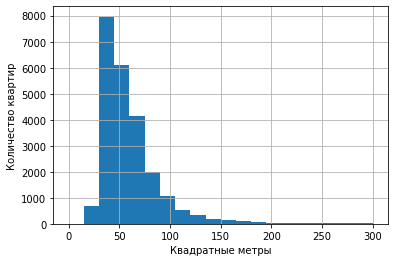

In [16]:
data['total_area'].hist(bins=20, range =(0,300))
plt.xlabel('Квадратные метры')
plt.ylabel('Количество квартир')
plt.show()


In [17]:
#rint(data['total_area'].value_counts())
data['total_area'].describe()

count    23565.000000
mean        60.322824
std         35.657060
min         12.000000
25%         40.000000
50%         52.000000
75%         69.700000
max        900.000000
Name: total_area, dtype: float64

**Вывод:**

Видно из графика, что больше всего продаются квартиры 40-45 метров. Квартиры больше 150 м2 уже очень редкие. 

### Изучим параметр: цена (last_price)

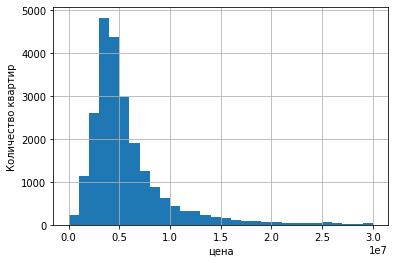

count    2.356500e+04
mean     6.540058e+06
std      1.091093e+07
min      1.219000e+04
25%      3.400000e+06
50%      4.646000e+06
75%      6.790000e+06
max      7.630000e+08
Name: last_price, dtype: float64

In [18]:
data['last_price'].hist(bins=30, range =(0,30000000))
plt.xlabel('цена')
plt.ylabel('Количество квартир')
plt.show()


data['last_price'].describe()

**Вывод:**

Видно из графика, что в основном квартиры стоят 4,6 млн рублей.Квартир дороже 20 млн мало. 

### Изучим параметр: число комнат (rooms)

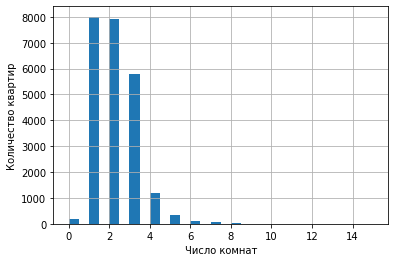

count    23565.000000
mean         2.070656
std          1.078591
min          0.000000
25%          1.000000
50%          2.000000
75%          3.000000
max         19.000000
Name: rooms, dtype: float64

In [19]:
data['rooms'].hist(bins=30, range =(0,15))
plt.xlabel('Число комнат')
plt.ylabel('Количество квартир')
#print(data['rooms'].value_counts())
plt.show()


data['rooms'].describe()

**Вывод:**

Видно из графика, что в основном на рынке представлены квартиры 1 комнатные. Чуть меньше 2х комнатых Квартиры больше 4х комнат, мало представлены на рынке.

Изучим параметр  следующие параметры: площадь, цена, число комнат, высота потолков

### Изучим параметр: высота потолков (ceiling_height)

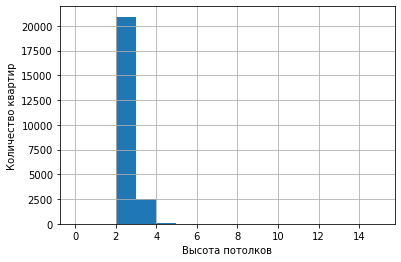

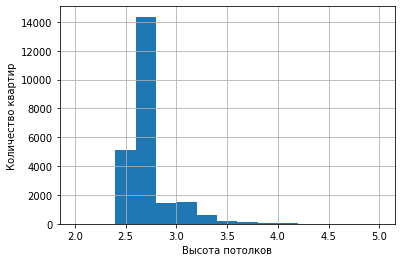

count    23565.000000
mean         2.724530
std          0.991026
min          1.000000
25%          2.600000
50%          2.650000
75%          2.700000
max        100.000000
Name: ceiling_height, dtype: float64

In [20]:
data['ceiling_height'].hist(bins=15, range =(0,15))

plt.xlabel('Высота потолков')
plt.ylabel('Количество квартир')
#print(data['ceiling_height'].value_counts())
plt.show()

data['ceiling_height'].hist(bins=15, range =(2,5))
plt.xlabel('Высота потолков')
plt.ylabel('Количество квартир')
plt.show()


data['ceiling_height'].describe()

**Вывод:**

Видно из графика, что в основном на рынке представлены квартиры высотой потолка 2,5-3 метра.Есть несколько квартир с высотой потолка более 4 м. Есть анимальная  высота потолка 100 м. Скорей всего это ошибка и это общая высота дома. 

### Изучим время продажи квартиры. Постройте гистограмму. Посчитайте среднее и медиану. Опишите, сколько обычно занимает продажа. 

In [21]:
data['days_exposition'].describe()

count    20394.000000
mean       180.741395
std        219.732782
min          1.000000
25%         45.000000
50%         95.000000
75%        231.000000
max       1580.000000
Name: days_exposition, dtype: float64

Медианное значение: 95 дней

Cреднее значение: 180 дней

Самая быстрая продажа: 1 день.

Свмая долгая продажа: 1580 дней, т.е. больше 4х лет.

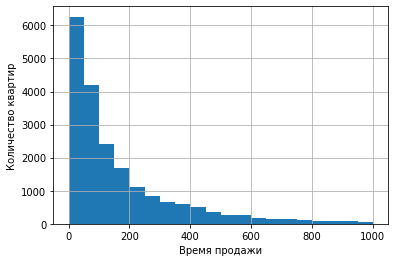

In [22]:
data['days_exposition'].hist(bins=20, range =(0,1000))
plt.xlabel('Время продажи')
plt.ylabel('Количество квартир')

plt.show()


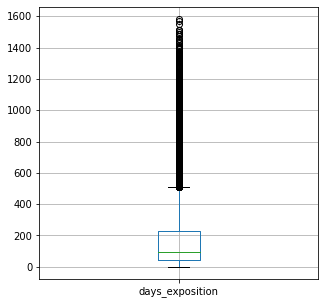

In [23]:
import matplotlib.pyplot as plt

data.boxplot(column = 'days_exposition', figsize=(5,5)) 
plt.show()


Вывод:
    
Основные продажи проходят за 200 дней. Нормальный разброс согласно boxplot 450 дней. Выше уже очень долго. 
Аномально быстрых продаж нет. Думаю если квартиру продали за 1 день это хорошо.

Уберем редкие и выбивающиеся значения. Согласно boxplot это квартиры которые продаются более 450 дней.

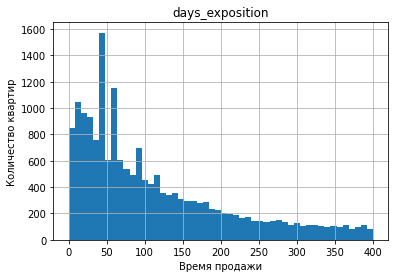

In [24]:
too_slow = data.query('days_exposition < 450')
too_slow.hist('days_exposition', bins=50, range =(0,400))
plt.xlabel('Время продажи')
plt.ylabel('Количество квартир')


plt.show()



Видно, что есть аномольно большое кол-во продаж. Рассмотрим по подробнее.

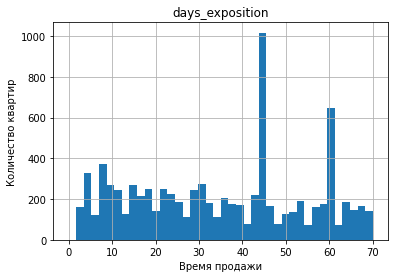

In [25]:
too_slow.hist('days_exposition', bins=40, range =(0,70))
plt.xlabel('Время продажи')
plt.ylabel('Количество квартир')

plt.show()


Вывод: 
    
Видим, что на 45 и 60 день квартиры продаются лучше всего. Возможно в эти дни объявления поднимаются на верхние позиции в поиске.    

### Рассмотрим какие факторы больше всего влияют на стоимость квартиры?  


#### Изучим, зависит ли цена от квадратного метра.

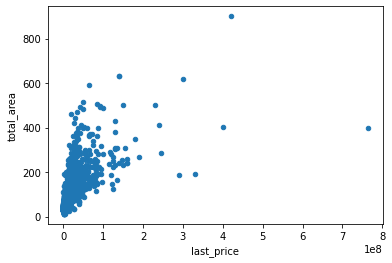

In [26]:
#data.pivot_table(index='total_area', values='last_price').plot(grid=True, figsize=(10, 5))
plt.show()
data.plot(x='last_price', y='total_area', style='o', kind='scatter', alpha=1)
plt.show()
   

Вывод:  

Прослеживается прямая зависимость между метражом и ценой квартиры. Но мы так же видим, что самые дорогие квартиры не обязательного большого метража.

#### Изучим, зависит ли цена от числа комнат.

In [27]:
data['rooms'].value_counts() # Оценим кол-во комнат в квартирах, которые представлены к продаже.

1     8004
2     7897
3     5779
4     1172
5      325
0      194
6      104
7       59
8       12
9        8
10       3
11       2
14       2
19       1
16       1
12       1
15       1
Name: rooms, dtype: int64

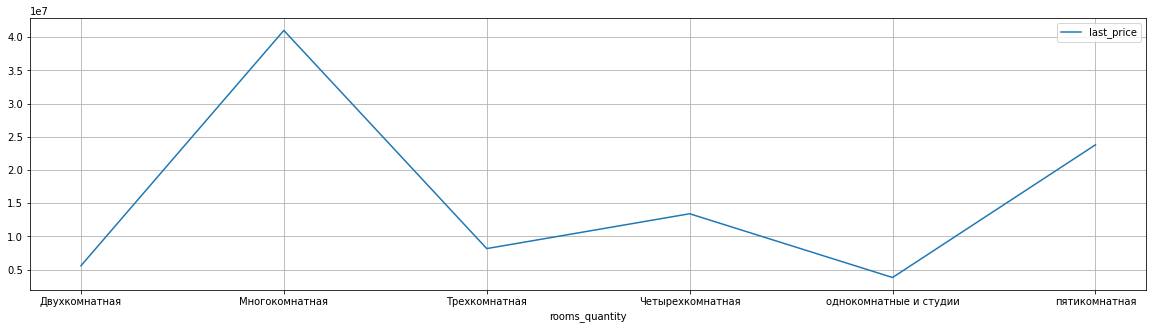

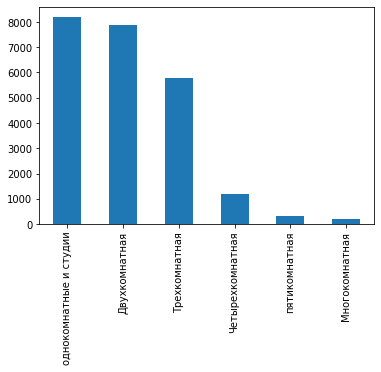

In [28]:
# Разобъем квартиры на группы по количеству комнат.
def rooms(quantity):
    if quantity <= 1:
        return 'однокомнатные и студии'
    if quantity == 2:
        return 'Двухкомнатная'
    if quantity == 3:
        return 'Трехкомнатная'
    if quantity == 4:
        return 'Четырехкомнатная' 
    if quantity == 5:
        return 'пятикомнатная' 
    return 'Многокомнатная'
data['rooms_quantity'] = data['rooms'].apply(rooms)
data['rooms_quantity'].value_counts()


data.pivot_table(index='rooms_quantity', values='last_price').plot(grid=True, figsize=(20, 5))
plt.show()

data['rooms_quantity'].value_counts().plot(kind='bar')
plt.show()



Вывод:

Все закономерно. На рынке больше всего студий и однокомнатных квартир. Цена на них ниже чем на все остальные. Многокомнатных квартир на рынке меньше всего и они дорожен всех.

#### Изучим, зависит ли цена от этажа (первого или последнего)

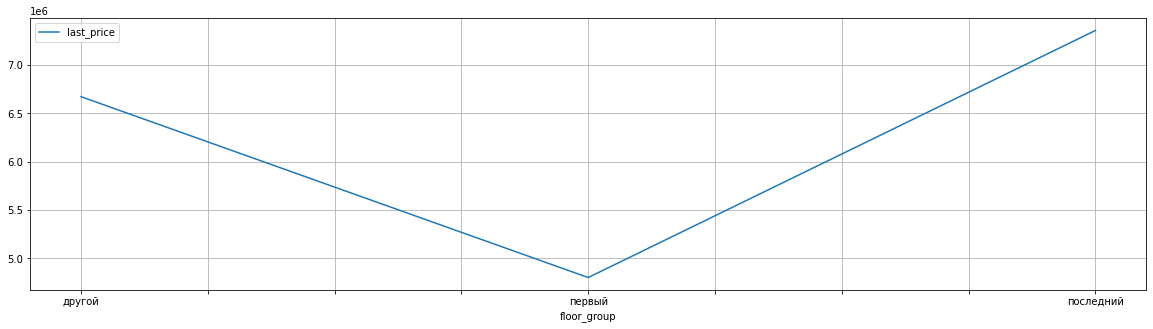

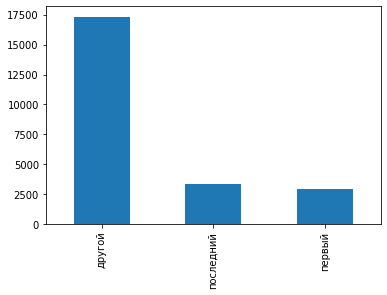

In [29]:
data.pivot_table(index='floor_group', values='last_price').plot(grid=True, figsize=(20, 5))
plt.show()

data['floor_group'].value_counts().plot(kind='bar')
plt.show()

Вывод:
    
На рынке больше всего квартир  с этажами отличными от первого и последнего. При этом цена на последнии этажи выше всего. И самые дешевые квартиры находятся на первом этаже.

#### Изучим, зависит ли цена от удалённости от центра. 


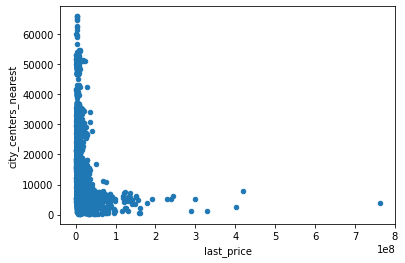

In [30]:
data.plot(x='last_price', y='city_сenters_nearest', style='o', kind='scatter', alpha=1)
plt.show()

In [31]:
display (data['last_price'].corr(data['city_сenters_nearest']))

-0.2063531426431107

Вывод:
    
Из графика видно, что квартиры в центре имеют разную стоимость. Есть как дорогие так и дешевее варианты. При этом мы видим, что чем дальше от центра тем меньше квартир с высокой стоимость. На конечную стоимость квартиры влияют многие факторы, качество ремонта, состояние дома, район, близость школы или магазинов. Но одно мы можем сказать, точно в центре можно продать квартиру дороже. Коэффициент корреляции подтверждает эту гипотезу.

#### Изучим, зависит ли цена от от даты размещения: дня недели, месяца и года

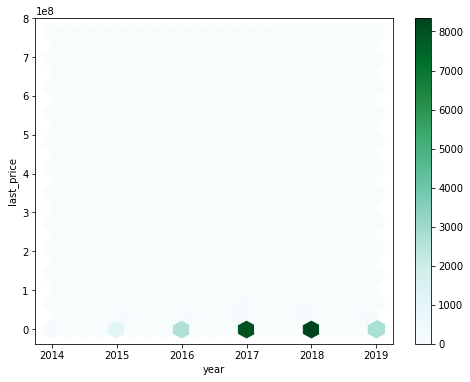

In [32]:
data.plot(x='year', y='last_price', gridsize=20, kind='hexbin', sharex=False, figsize=(8, 6) )
plt.show()

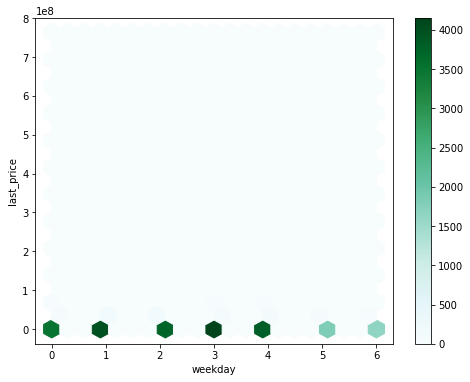

In [33]:
data.plot(x='weekday', y='last_price',  gridsize=20, kind='hexbin', sharex=False, figsize=(8, 6))

plt.show()

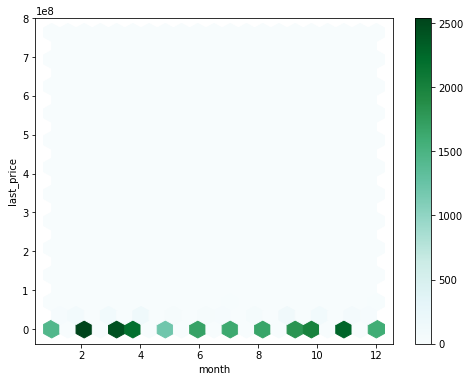

In [34]:
data.plot(x='month', y='last_price', gridsize=20, kind='hexbin', sharex=False, figsize=(8, 6))
plt.show()



Вывод:

Самые дорогие квартиры были размещены: 2018.03.02

Самые дешевые квартиры были размещены: 2016.06.05

Такая динамика рынка я думаю связана с общей экономической ситацией в стране. Кризис 2015 -2016 г.(санкции, цены на нефть)
 и подъем экономики в 2018 г

#### "Выберем 10 населённых пунктов с наибольшим числом объявлений. Посчитаем среднюю цену квадратного метра в этих населённых пунктах. Выделите населённые пункты с самой высокой и низкой стоимостью жилья. 

In [35]:
top_ten_сity = data['locality_name'].value_counts().head(10)

display (top_ten_сity)


Санкт-Петербург      15651
посёлок Мурино         520
посёлок Шушары         439
Всеволожск             398
Пушкин                 369
Колпино                338
посёлок Парголово      327
Гатчина                307
деревня Кудрово        299
Выборг                 237
Name: locality_name, dtype: int64

In [36]:
top_ten_сity_group = data[data['locality_name'].isin(top_ten_сity.index)]
top_ten_mean_price=top_ten_сity_group['metr_price'].mean()
display ('средняя цена квадратного метра:', top_ten_mean_price)
display ()

#print (top_ten_сity_group.pivot_table(index='locality_name', values='metr_price'))
top_ten_сity_metr_price = top_ten_сity_group.pivot_table(index='locality_name', values='metr_price')
top_ten_сity_metr_price = top_ten_сity_metr_price.sort_values(by='metr_price',ascending=False )
display (top_ten_сity_metr_price)                                       

'средняя цена квадратного метра:'

109067.07836907599

,metr_price
locality_name,
Санкт-Петербург,114868.433902
Пушкин,103125.373984
деревня Кудрово,92473.086957
посёлок Парголово,90175.489297
посёлок Мурино,85672.803846
посёлок Шушары,78550.883827
Колпино,75424.150888
Гатчина,68745.693811
Всеволожск,68654.007538


Вывод:

Как и ожидалось самая дорогая недвижимость находится в г. Санкт-Петербург и в его ближайших пригородах(Пушкин, Кудрово, Парголово, Мурино, Шушары), которын по сути являются частью Санкт-Петербурга.

Дешевле всего(из топ 10, а не из всего списка) недвижимость  в г. Выборг, т.к. он наиболее удален от Санкт-Петербурга


#### Изучим предложения квартир: для каждой квартиры есть информация о расстоянии до центра. Выделим квартиры в Санкт-Петербурге (*'locality_name'*). Наша задача — выяснить, какая область входит в центр. 

In [37]:
# Выделим квартиры в Санкт-Петербурге
spb_center = data.query('locality_name == "Санкт-Петербург"')
#print (spb_center)

# Создадим столбец с расстоянием до центра в километрах: округлим до целых значений.
spb_center ['city_centers_km' ] = spb_center['city_сenters_nearest']/1000
spb_center ['city_centers_km'] = spb_center ['city_centers_km'].round()
#print(data)



/tmp/ipykernel_32/3769725523.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  spb_center ['city_centers_km' ] = spb_center['city_сenters_nearest']/1000
/tmp/ipykernel_32/3769725523.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  spb_center ['city_centers_km'] = spb_center ['city_centers_km'].round()


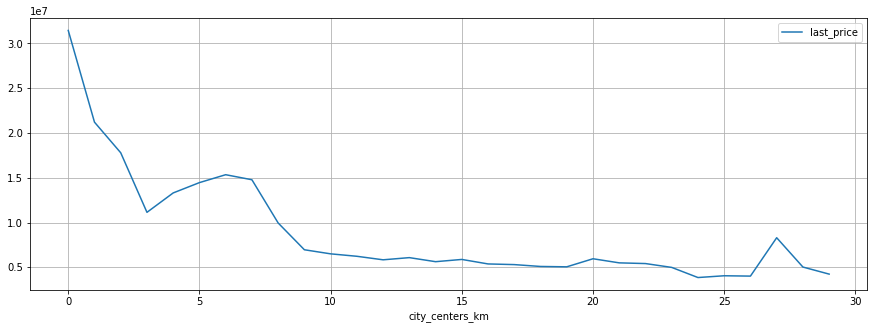

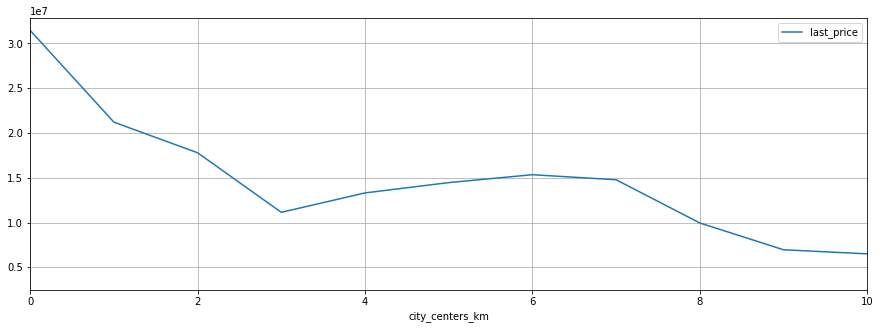

In [38]:
#Посчитаем среднюю цену для каждого километра.
spb_center.pivot_table(index='city_centers_km', values='last_price', aggfunc = 'mean').plot(grid=True, figsize=(15, 5))
plt.show()

spb_center.pivot_table(index='city_centers_km', values='last_price', aggfunc = 'mean').plot(grid=True, xlim=(0,10), figsize=(15, 5))
plt.show()




Вывод:
    
По графику видно, что стоимость при отдалении от центра больше 7 км начинает падать. Значит область от 0 до 7 км будем считать центром.

###  Выделим сегмент квартир в центре. Проанализируем эту территорию и изучите следующие параметры: площадь, цена, число комнат, высота потолков.

In [39]:
spb_center_segment = spb_center.query('city_centers_km<=7')
display (spb_center_segment)

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,days_exposition,metr_price,year,weekday,month,floor_group,area_ratio,kitchen_ratio,rooms_quantity,city_centers_km
3,0,64900000.0,159.00,2015-07-24,3,2.65,14,90.816648,9,NaN,...,424.0,408176,2015,4,7,другой,57,17,Трехкомнатная,7.0
24,8,6500000.0,97.20,2015-10-31,2,2.65,3,46.500000,1,NaN,...,265.0,66872,2015,5,10,первый,47,20,Двухкомнатная,2.0
35,6,15500000.0,149.00,2017-06-26,5,2.65,5,104.000000,4,NaN,...,644.0,104026,2017,0,6,другой,69,11,пятикомнатная,4.0
51,7,45000000.0,161.00,2017-10-17,3,3.20,8,38.000000,4,NaN,...,541.0,279503,2017,1,10,другой,23,31,Трехкомнатная,7.0
52,20,11795000.0,136.00,2017-09-22,6,3.00,2,94.000000,2,NaN,...,NaN,86727,2017,4,9,последний,69,8,Многокомнатная,7.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23665,11,4250000.0,47.00,2016-05-20,1,2.65,6,18.200000,1,False,...,131.0,90425,2016,4,5,первый,38,31,однокомнатные и студии,5.0
23681,13,5250000.0,43.00,2018-05-11,2,2.50,5,29.000000,2,NaN,...,80.0,122093,2018,4,5,другой,67,13,Двухкомнатная,7.0
23690,3,5500000.0,52.00,2018-07-19,2,2.65,5,31.000000,2,NaN,...,15.0,105769,2018,3,7,другой,59,11,Двухкомнатная,6.0
23691,11,9470000.0,72.90,2016-10-13,2,2.75,25,40.300000,7,NaN,...,519.0,129903,2016,3,10,другой,55,14,Двухкомнатная,4.0


#### Площадь



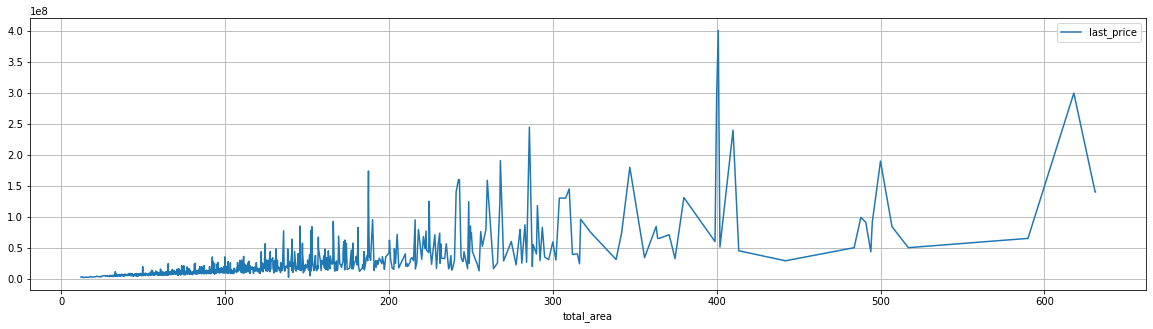

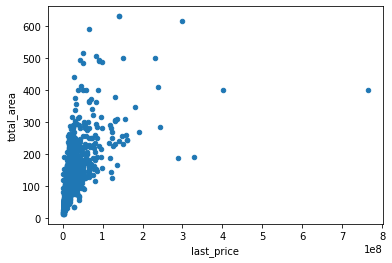

'Коэффициент корреляции:'

0.6136073192218386

In [40]:
spb_center_segment.pivot_table(index='total_area', values='last_price').plot(grid=True, figsize=(20, 5))
plt.show()


spb_center_segment.plot(x='last_price', y='total_area', style='o', kind='scatter', alpha=1)
plt.show()

display ('Коэффициент корреляции:',spb_center_segment['last_price'].corr(spb_center_segment['total_area']))


Вывод:
    
В центре на конечную стоимость как ожидалось влияет метраж. Не без исключение конечно. Коэффициент корреляции  это подтверждает.




#### Число комнат

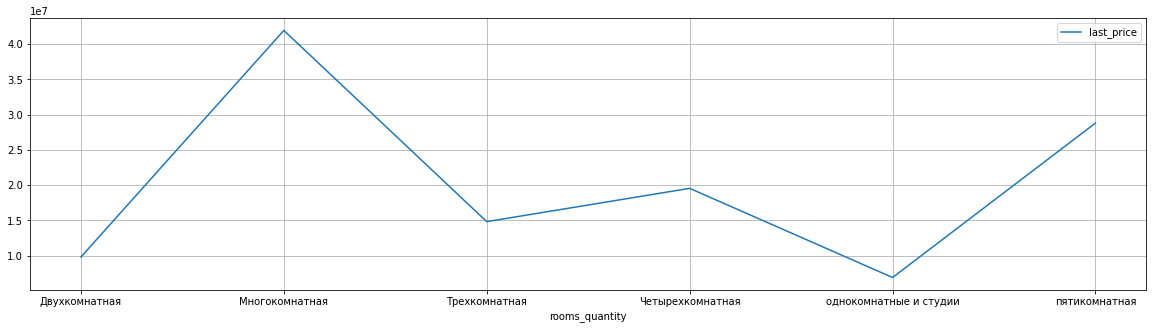

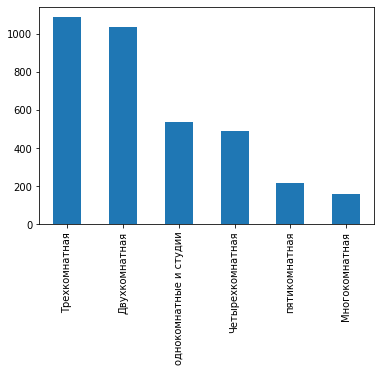

In [41]:
spb_center_segment.pivot_table(index='rooms_quantity', values='last_price').plot(grid=True, figsize=(20, 5))
plt.show()

spb_center_segment['rooms_quantity'].value_counts().plot(kind='bar')
plt.show()

Вывод:
    
Как и везде, многокомнатные квартиры дороже всего. Студии и однокомнатные дешевле всех. Все закономерно. При этом в центра меньше всего студий и однокомнатных квартир, в то время как в предыдущих выборках именно студии были в большинстве. Больше всего в центре 3-х и 2-х комнатных квартир.

#### Высота потолков

In [42]:
spb_center_segment['ceiling_height'].describe()

count    3518.000000
mean        2.954460
std         0.737484
min         2.400000
25%         2.650000
50%         2.800000
75%         3.150000
max        32.000000
Name: ceiling_height, dtype: float64

In [43]:
data['ceiling_height'].describe()                                         

count    23565.000000
mean         2.724530
std          0.991026
min          1.000000
25%          2.600000
50%          2.650000
75%          2.700000
max        100.000000
Name: ceiling_height, dtype: float64

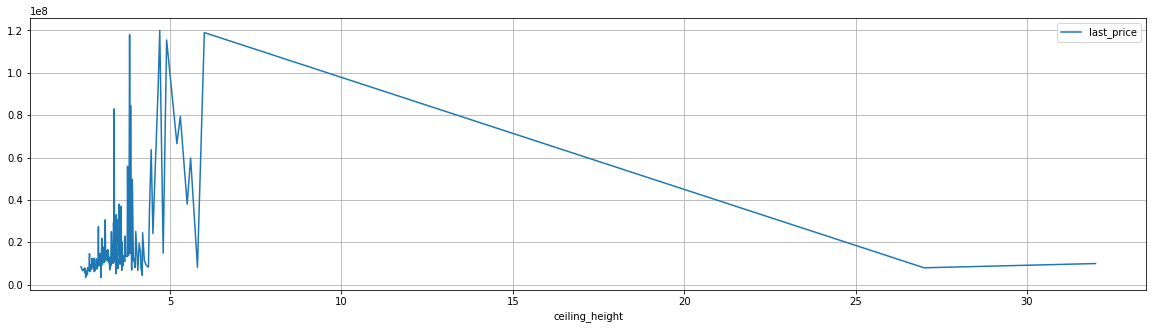

'Коэффициент корреляции:'

0.07070428202541311

In [44]:
spb_center_segment.pivot_table(index='ceiling_height', values='last_price').plot(grid=True, figsize=(20, 5))
plt.show()

display ('Коэффициент корреляции:',spb_center_segment['ceiling_height'].corr(spb_center_segment['last_price']))


Вывод:
    
В целом при увеличении высоты потолка цена растет, но это явно не главный фактор конечной стоимости квартиры. Так же можем обратить внимание, что в центре медианное значение высоты потолка выше, чем во всем датафрейми, возможно это связано с тем, что в центре больше исторических зданий, где высота потолков выше.    

### Выделим факторы, которые влияют на стоимость квартиры (число комнат, этаж, удалённость от центра, дата размещения объявления). 

In [45]:
# Факторы влияющие на стоимоть в центре Санкт-Петербурга
#print ('Факторы влияющие на стоимость в центре Санкт-Петербурга')
#print ('Коэффициент корреляции число комнат:',spb_center_segment['last_price'].corr(spb_center_segment['rooms']))
#print ('Коэффициент корреляции этаж:',spb_center_segment['last_price'].corr(spb_center_segment['floor']))
#print ('Коэффициент корреляции удаленность:',spb_center_segment['last_price'].corr(spb_center_segment['city_сenters_nearest']))
#print ('Коэффициент корреляции дата:',spb_center_segment['last_price'].corr(spb_center_segment['days_exposition']))

#print ()
 
# Факторы влияющие на стоимоть в Санкт-Петербурга
#print ('Факторы влияющие на стоимость в Санкт-Петербурга')
#print ('Коэффициент корреляции число комнат:',spb_center['last_price'].corr(spb_center['rooms']))
#print ('Коэффициент корреляции этаж:',spb_center['last_price'].corr(spb_center['floor']))
#print ('Коэффициент корреляции удаленность:',spb_center['last_price'].corr(spb_center['city_сenters_nearest']))
#print ('Коэффициент корреляции дата:',spb_center['last_price'].corr(spb_center['days_exposition']))


# Факторы влияющие на стоимоть в Санкт-Петербурге


#spb_center_sort = spb_center.pivot_table (index = 'last_price', values = ['rooms','floor','city_сenters_nearest','days_exposition'])
#pd.plotting.scatter_matrix(spb_center_sort, figsize=(9,9))
#spb_center_sort.corr()

#spb_center_segment_sort  = spb_center_segment.pivot_table (index = 'last_price', values = ['rooms','floor','city_сenters_nearest','days_exposition'])
#pd.plotting.scatter_matrix(spb_center_segment_sort, figsize=(9,9))
#spb_center_segment_sort.corr()



Вывод:

В целом динамика везде одинаковая Быть может в центре больше внимания удиляют выбору этажа.

In [51]:
# Факторы влияющие на стоимоть в центре Санкт-Петербурга

display (spb_center_segment [[ 'last_price','rooms','floor','city_сenters_nearest','days_exposition']].corr())
spb_center_segment_plot = spb_center_segment [[ 'last_price','rooms','floor','city_сenters_nearest','days_exposition']]

#Факторы влияющие на стоимоть в Санкт-Петербурга
display (spb_center [[ 'last_price','rooms','floor','city_сenters_nearest','days_exposition']].corr())
spb_center_plot = spb_center [[ 'last_price','rooms','floor','city_сenters_nearest','days_exposition']]



,last_price,rooms,floor,city_сenters_nearest,days_exposition
last_price,1.000000,0.314808,0.108509,-0.042318,0.066060
rooms,0.314808,1.000000,-0.043949,-0.170981,0.136413
floor,0.108509,-0.043949,1.000000,0.237102,0.011109
city_сenters_nearest,-0.042318,-0.170981,0.237102,1.000000,-0.054049
days_exposition,0.066060,0.136413,0.011109,-0.054049,1.000000


,last_price,rooms,floor,city_сenters_nearest,days_exposition
last_price,1.000000,0.372108,-0.000586,-0.259220,0.092574
rooms,0.372108,1.000000,-0.161592,-0.294018,0.143944
floor,-0.000586,-0.161592,1.000000,0.227782,-0.033532
city_сenters_nearest,-0.259220,-0.294018,0.227782,1.000000,-0.137544
days_exposition,0.092574,0.143944,-0.033532,-0.137544,1.000000


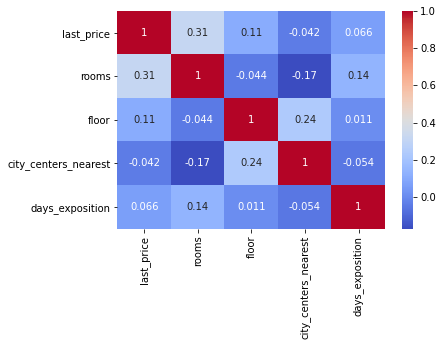

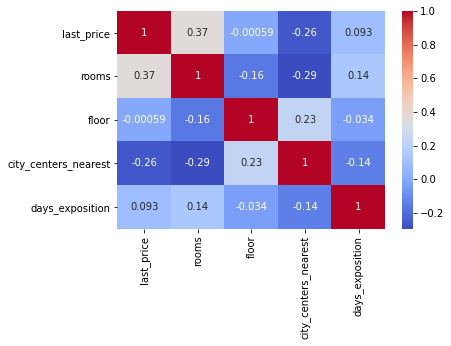

In [47]:
#еще один метод решил посмотреть.

sns.heatmap(spb_center_segment_plot.corr(),cmap='coolwarm',annot=True)
plt.show()
sns.heatmap(spb_center_plot.corr(),cmap='coolwarm',annot=True)
plt.show()


'Факторы влияющие на стоимость в центре Санкт-Петербурга'

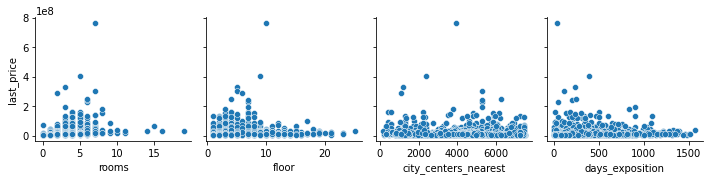

'Факторы влияющие на стоимоть в Санкт-Петербурге'

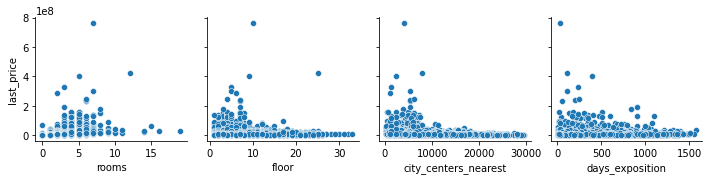

In [48]:
display ('Факторы влияющие на стоимость в центре Санкт-Петербурга')
sns.pairplot(data=spb_center_segment_plot,
                  y_vars=['last_price'],
                  x_vars=['rooms','floor','city_сenters_nearest','days_exposition'])
plt.show()

display ( 'Факторы влияющие на стоимоть в Санкт-Петербурге')
sns.pairplot(data=spb_center_plot,
                  y_vars=['last_price'],
                  x_vars=['rooms','floor','city_сenters_nearest','days_exposition'])
plt.show()

Вывод:
    
В цешлом все как и в предудещм ввыоде. Продублирую его.  
*В целом динамика везде одинаковая Быть может в центре больше внимания удиляют выбору этажа.*

Но так же видно, что цены на жилье значительно дороже в центре чем во всем Санкт-Петербурге.


## Общий вывод

Мы видим, что больше всего на рынке представлено квартир со средней площадью 40-45 м и средней стоимостью 4,6 млн. В основном это квартиры 1 комнатные и 2 комнатные квартиры.
В основном квартиры имеют высота потолка 2,5-3 м.

В среднем квартиры продаются около 200 дней. Лучше продаются квартиры на 45 и 60 день от выставления их на продажу. Конечная цена на квартиры напрямую зависит от количества кв. м в квартире. Так же она зависит от количества комнат(но это так же связано с метражлм квартир). Чем больше комнат, тем цена выше. Так же цена зависит от этажа, чем выше этаж, тем цена выше. Самые дешевые квартиры находятся на первых этажах.

Цена на квартиру зависит от удалённости ее от цента Санкт Петербурга. Мы выяснили, что самые дорогие квартиры находятся в области Санкт-Петербурга, которые находятся не дальше 7 км от центра. При этом в центре, меньше чем в остальных регионах однокомнатных квартир и студий, а преобладают 3х и 2х комнатные квартиры.